In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


#Importing Train and Test data

train=pd.read_csv('C:/Users/deepak/Documents/Great Indian data scientist hiring challenge/dataset/new/Dataset/Train.csv')
test=pd.read_csv('C:/Users/deepak/Documents/Great Indian data scientist hiring challenge/dataset/new/Dataset/Test.csv')


In [2]:
train.shape

(5566, 6)

In [3]:
test.shape

(2446, 5)

In [4]:
train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [5]:
import pandas_profiling as pp
pp.ProfileReport(train)

Number of variables,6
Number of observations,5566
Total Missing (%),0.0%
Total size in memory,261.0 KiB
Average record size in memory,48.0 B
Numeric,2
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
#checking skewness of inv_amt
train.Inv_Amt.skew()

-0.002940644036631856

In [7]:
train['Product_Category'].value_counts()

CLASS-1758    1498
CLASS-1274     986
CLASS-1522     851
CLASS-1250     451
CLASS-1376     365
CLASS-1963     230
CLASS-1249     176
CLASS-1828     113
CLASS-2141     108
CLASS-1721     107
CLASS-1567      84
CLASS-1919      70
CLASS-1850      60
CLASS-2112      53
CLASS-1477      50
CLASS-1870      36
CLASS-2241      36
CLASS-1309      32
CLASS-2003      32
CLASS-1429      32
CLASS-1322      28
CLASS-1964      28
CLASS-1294      25
CLASS-1770      19
CLASS-1983      17
CLASS-1867      15
CLASS-1652      15
CLASS-2038      13
CLASS-1805      12
CLASS-2152       9
CLASS-1248       5
CLASS-1688       4
CLASS-2146       2
CLASS-2015       2
CLASS-1957       1
CLASS-1838       1
Name: Product_Category, dtype: int64

In [8]:
#Creating aggregating features using inv_amt for train_data
gl_data=train[['Inv_Amt','GL_Code']]
gl_agg = gl_data.groupby('GL_Code', as_index = False).agg(['count', 'mean', 'max', 'min','skew','var']).reset_index()

# List of column names
columns = ['GL_Code']

# Iterate through the variables names
for var in gl_agg.columns.levels[0]:
    # Skip the id name
    if var != 'GL_Code':
        
        # Iterate through the stat names
        for stat in gl_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('GL_%s_%s' % (var, stat))
gl_agg.columns = columns



vendor_data=train[['Inv_Amt','Vendor_Code']]
vendor_agg = vendor_data.groupby('Vendor_Code', as_index = False).agg(['count', 'mean', 'max', 'min','skew','var']).reset_index()

# List of column names
columns = ['Vendor_Code']

# Iterate through the variables names
for var in vendor_agg.columns.levels[0]:
    # Skip the id name
    if var != 'Vendor_Code':
        
        # Iterate through the stat names
        for stat in vendor_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('vendor_%s_%s' % (var, stat))
vendor_agg.columns = columns


train = train.merge(gl_agg, on = 'GL_Code', how = 'left')
train = train.merge(vendor_agg, on = 'Vendor_Code', how = 'left')

train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,GL_Inv_Amt_count,GL_Inv_Amt_mean,GL_Inv_Amt_max,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,vendor_Inv_Amt_count,vendor_Inv_Amt_mean,vendor_Inv_Amt_max,vendor_Inv_Amt_min,vendor_Inv_Amt_skew,vendor_Inv_Amt_var
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,388,49.375567,99.99,0.01,0.028570,828.052348,66,48.576970,98.69,0.21,-0.005636,953.632049
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,1297,50.911789,99.94,0.02,-0.048378,839.781136,330,51.188697,99.94,0.02,-0.095853,773.697238
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,962,50.347817,99.94,0.16,0.006675,846.296643,1,79.020000,79.02,79.02,NaN,NaN
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,802,48.354800,99.92,0.21,0.059086,848.141511,111,46.048739,96.43,0.94,-0.046598,716.130277
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,1297,50.911789,99.94,0.02,-0.048378,839.781136,1,63.350000,63.35,63.35,NaN,NaN


In [9]:
train.columns

Index(['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt', 'Item_Description',
       'Product_Category', 'GL_Inv_Amt_count', 'GL_Inv_Amt_mean',
       'GL_Inv_Amt_max', 'GL_Inv_Amt_min', 'GL_Inv_Amt_skew', 'GL_Inv_Amt_var',
       'vendor_Inv_Amt_count', 'vendor_Inv_Amt_mean', 'vendor_Inv_Amt_max',
       'vendor_Inv_Amt_min', 'vendor_Inv_Amt_skew', 'vendor_Inv_Amt_var'],
      dtype='object')

In [10]:
# Fill the missing values with 0 
train['GL_Inv_Amt_count'] = train['GL_Inv_Amt_count'].fillna(0)
train['GL_Inv_Amt_mean'] = train['GL_Inv_Amt_mean'].fillna(0)
train['GL_Inv_Amt_max'] = train['GL_Inv_Amt_max'].fillna(0)
train['GL_Inv_Amt_min'] = train['GL_Inv_Amt_min'].fillna(0)
train['GL_Inv_Amt_skew'] = train['GL_Inv_Amt_skew'].fillna(0)
train['GL_Inv_Amt_var'] = train['GL_Inv_Amt_var'].fillna(0)
train['vendor_Inv_Amt_count'] = train['vendor_Inv_Amt_count'].fillna(0)
train['vendor_Inv_Amt_mean'] = train['vendor_Inv_Amt_mean'].fillna(0)
train['vendor_Inv_Amt_max'] = train['vendor_Inv_Amt_max'].fillna(0)
train['vendor_Inv_Amt_min'] = train['vendor_Inv_Amt_min'].fillna(0)
train['vendor_Inv_Amt_skew'] = train['vendor_Inv_Amt_skew'].fillna(0)
train['vendor_Inv_Amt_var'] = train['vendor_Inv_Amt_var'].fillna(0)

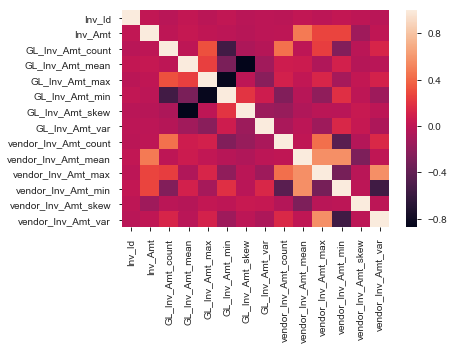

In [11]:
#Checking feature importance of newly created features
import seaborn as sns
%matplotlib inline

corr=train.corr()
fig_size=(25,25)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [12]:
#Creating aggregating features using inv_amt for test_data
gl_data=test[['Inv_Amt','GL_Code']]
gl_agg = gl_data.groupby('GL_Code', as_index = False).agg(['count', 'mean', 'max', 'min','skew','var']).reset_index()

# List of column names
columns = ['GL_Code']

# Iterate through the variables names
for var in gl_agg.columns.levels[0]:
    # Skip the id name
    if var != 'GL_Code':
        
        # Iterate through the stat names
        for stat in gl_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('GL_%s_%s' % (var, stat))
gl_agg.columns = columns



vendor_data=test[['Inv_Amt','Vendor_Code']]
vendor_agg = vendor_data.groupby('Vendor_Code', as_index = False).agg(['count', 'mean', 'max', 'min','skew','var']).reset_index()

# List of column names
columns = ['Vendor_Code']

# Iterate through the variables names
for var in vendor_agg.columns.levels[0]:
    # Skip the id name
    if var != 'Vendor_Code':
        
        # Iterate through the stat names
        for stat in vendor_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('vendor_%s_%s' % (var, stat))
vendor_agg.columns = columns


test = test.merge(gl_agg, on = 'GL_Code', how = 'left')
test = test.merge(vendor_agg, on = 'Vendor_Code', how = 'left')

test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,GL_Inv_Amt_count,GL_Inv_Amt_mean,GL_Inv_Amt_max,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,vendor_Inv_Amt_count,vendor_Inv_Amt_mean,vendor_Inv_Amt_max,vendor_Inv_Amt_min,vendor_Inv_Amt_skew,vendor_Inv_Amt_var
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...,694,48.783141,99.94,0.11,0.086399,834.260104,76,48.621447,99.92,0.51,0.110441,854.614359
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...,364,50.846978,99.92,0.04,-0.028102,824.160885,4,46.410000,96.56,3.69,0.512605,1524.488467
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...,364,50.846978,99.92,0.04,-0.028102,824.160885,16,55.615000,99.19,2.50,-0.580881,881.386173
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...,561,50.512496,99.88,0.09,0.009827,814.406011,3,23.953333,32.62,17.67,1.252390,60.135833
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...,694,48.783141,99.94,0.11,0.086399,834.260104,76,48.621447,99.92,0.51,0.110441,854.614359


In [13]:
# Fill the missing values with 0 
test['GL_Inv_Amt_count'] = test['GL_Inv_Amt_count'].fillna(0)
test['GL_Inv_Amt_mean'] = test['GL_Inv_Amt_mean'].fillna(0)
test['GL_Inv_Amt_max'] = test['GL_Inv_Amt_max'].fillna(0)
test['GL_Inv_Amt_min'] = test['GL_Inv_Amt_min'].fillna(0)
test['GL_Inv_Amt_skew'] = test['GL_Inv_Amt_skew'].fillna(0)
test['GL_Inv_Amt_var'] = test['GL_Inv_Amt_var'].fillna(0)
test['vendor_Inv_Amt_count'] = test['vendor_Inv_Amt_count'].fillna(0)
test['vendor_Inv_Amt_mean'] = test['vendor_Inv_Amt_mean'].fillna(0)
test['vendor_Inv_Amt_max'] = test['vendor_Inv_Amt_max'].fillna(0)
test['vendor_Inv_Amt_min'] = test['vendor_Inv_Amt_min'].fillna(0)
test['vendor_Inv_Amt_skew'] = test['vendor_Inv_Amt_skew'].fillna(0)
test['vendor_Inv_Amt_var'] = test['vendor_Inv_Amt_var'].fillna(0)

In [14]:
#Combining Train and test for FE
train['flag']='train'
test['flag']='test'

data=train.append(test)

In [15]:
data.shape

(8012, 19)

In [16]:
data.head()

,GL_Code,GL_Inv_Amt_count,GL_Inv_Amt_max,GL_Inv_Amt_mean,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,Inv_Amt,Inv_Id,Item_Description,Product_Category,Vendor_Code,flag,vendor_Inv_Amt_count,vendor_Inv_Amt_max,vendor_Inv_Amt_mean,vendor_Inv_Amt_min,vendor_Inv_Amt_skew,vendor_Inv_Amt_var
0,GL-6100410,388,99.99,49.375567,0.01,0.028570,828.052348,83.24,15001,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,VENDOR-1676,train,66,98.69,48.576970,0.21,-0.005636,953.632049
1,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,51.18,15002,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,VENDOR-1883,train,330,99.94,51.188697,0.02,-0.095853,773.697238
2,GL-6050100,962,99.94,50.347817,0.16,0.006675,846.296643,79.02,15004,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,VENDOR-1999,train,1,79.02,79.020000,79.02,0.000000,0.000000
3,GL-6101400,802,99.92,48.354800,0.21,0.059086,848.141511,48.50,15005,Store Construction General Requirements Coloni...,CLASS-1522,VENDOR-1771,train,111,96.43,46.048739,0.94,-0.046598,716.130277
4,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,63.35,15006,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,VENDOR-1331,train,1,63.35,63.350000,63.35,0.000000,0.000000


In [17]:
#Outlier check for inv_amt
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
print(numeric_var_names) 

sales_num=data[numeric_var_names]

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=sales_num.apply(lambda x: var_summary(x)).T

num_summary=num_summary.drop(['Inv_Id'],axis=0)

['GL_Inv_Amt_count', 'GL_Inv_Amt_max', 'GL_Inv_Amt_mean', 'GL_Inv_Amt_min', 'GL_Inv_Amt_skew', 'GL_Inv_Amt_var', 'Inv_Amt', 'Inv_Id', 'vendor_Inv_Amt_count', 'vendor_Inv_Amt_max', 'vendor_Inv_Amt_mean', 'vendor_Inv_Amt_min', 'vendor_Inv_Amt_skew', 'vendor_Inv_Amt_var']


In [18]:
# No outlier in inv_amt after looking at the percentile distribution
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
GL_Inv_Amt_count,8012.0,0.0,7.267870e+06,907.123065,802.000000,494.195081,244228.777763,19.000000,42.000000,148.000000,220.000000,445.000000,802.000000,1297.000000,1618.000000,1618.000000,1618.000000,1618.000000
GL_Inv_Amt_max,8012.0,0.0,7.998670e+05,99.833628,99.940000,0.443253,0.196473,94.470000,98.360000,99.370000,99.600000,99.920000,99.940000,99.960000,99.960000,99.960000,99.990000,99.990000
GL_Inv_Amt_mean,8012.0,0.0,3.991426e+05,49.818093,49.634623,1.206257,1.455055,42.262632,47.853865,47.853865,48.354800,48.783141,49.634623,50.846978,50.911789,51.789955,51.819177,53.961370
GL_Inv_Amt_min,8012.0,0.0,1.360700e+03,0.169833,0.090000,0.315743,0.099694,0.010000,0.010000,0.020000,0.020000,0.040000,0.090000,0.210000,0.420000,0.590000,1.960000,3.850000
GL_Inv_Amt_skew,8012.0,0.0,8.567083e+01,0.010693,0.006675,0.060548,0.003666,-0.095689,-0.095689,-0.079832,-0.048378,-0.028102,0.006675,0.059086,0.086399,0.095106,0.097629,0.675041
GL_Inv_Amt_var,8012.0,0.0,6.651569e+06,830.200855,834.260104,19.229014,369.754995,724.565334,724.565334,795.826652,814.406011,826.033083,834.260104,839.781136,848.141511,848.141511,860.010259,911.555172
Inv_Amt,8012.0,0.0,3.991426e+05,49.818093,49.540000,28.808002,829.900987,0.010000,0.911100,4.995500,10.151000,25.090000,49.540000,74.627500,90.116000,94.724500,98.968900,99.990000
vendor_Inv_Amt_count,8012.0,0.0,4.824020e+05,60.209935,16.000000,84.566772,7151.538995,1.000000,1.000000,1.000000,1.000000,3.000000,16.000000,88.000000,175.000000,253.000000,330.000000,330.000000
vendor_Inv_Amt_max,8012.0,0.0,6.778545e+05,84.604904,96.430000,23.437599,549.321046,0.160000,5.741100,27.966000,47.312000,79.700000,96.430000,99.300000,99.900000,99.940000,99.940000,99.990000
vendor_Inv_Amt_mean,8012.0,0.0,3.991426e+05,49.818093,49.152289,14.575640,212.449281,0.160000,5.578800,23.550000,33.955000,46.048739,49.152289,54.571429,65.448000,76.062250,93.922250,99.840000


## Feature Engineering

In [19]:
# Number of Words
data['word_count'] = data['Item_Description'].apply(lambda x: len(str(x).split(" ")))

#Number of characters
data['char_count'] = data['Item_Description'].str.len()

#Word density
data['word_density'] = data['char_count'] / (data['word_count']+1)


#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Item_Description'].apply(lambda x: avg_word(x))

#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Item_Description'].apply(lambda x: len([x for x in x.split() if x in stop]))

# Number of special characters
data['hastags'] = data['Item_Description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

#Number of numerics
data['numerics'] = data['Item_Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


#Number of Uppercase words
data['upper'] = data['Item_Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))


In [20]:
data.head()

,GL_Code,GL_Inv_Amt_count,GL_Inv_Amt_max,GL_Inv_Amt_mean,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,Inv_Amt,Inv_Id,Item_Description,...,vendor_Inv_Amt_skew,vendor_Inv_Amt_var,word_count,char_count,word_density,avg_word,stopwords,hastags,numerics,upper
0,GL-6100410,388,99.99,49.375567,0.01,0.028570,828.052348,83.24,15001,Artworking/Typesetting Production Jun 2009 Cha...,...,-0.005636,953.632049,13,113,8.071429,7.769231,1,0,1,1
1,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,51.18,15002,Auto Leasing Corporate Services Corning Inc /N...,...,-0.095853,773.697238,16,111,6.529412,6.400000,1,0,0,0
2,GL-6050100,962,99.94,50.347817,0.16,0.006675,846.296643,79.02,15004,Store Management Lease/Rent Deltona Corp Real ...,...,0.000000,0.000000,10,70,6.363636,6.100000,0,0,0,0
3,GL-6101400,802,99.92,48.354800,0.21,0.059086,848.141511,48.50,15005,Store Construction General Requirements Coloni...,...,-0.046598,716.130277,15,107,6.687500,6.642857,0,0,0,0
4,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,63.35,15006,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,...,0.000000,0.000000,14,110,7.333333,6.928571,0,0,1,0


In [21]:
#Cleaning text data
import textblob
data['Item_Description'] = data['Item_Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Item_Description'] = data['Item_Description'].str.replace("[!@#$+%*:()'-]",'')
data['Item_Description'] = data['Item_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
data['Item_Description'] = data['Item_Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
data.head()

,GL_Code,GL_Inv_Amt_count,GL_Inv_Amt_max,GL_Inv_Amt_mean,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,Inv_Amt,Inv_Id,Item_Description,...,vendor_Inv_Amt_skew,vendor_Inv_Amt_var,word_count,char_count,word_density,avg_word,stopwords,hastags,numerics,upper
0,GL-6100410,388,99.99,49.375567,0.01,0.028570,828.052348,83.24,15001,artworking/typesetting production jun 2009 cha...,...,-0.005636,953.632049,13,113,8.071429,7.769231,1,0,1,1
1,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,51.18,15002,auto leasing corporate service corning inc /ny...,...,-0.095853,773.697238,16,111,6.529412,6.400000,1,0,0,0
2,GL-6050100,962,99.94,50.347817,0.16,0.006675,846.296643,79.02,15004,store management lease/rent deltona corp real ...,...,0.000000,0.000000,10,70,6.363636,6.100000,0,0,0,0
3,GL-6101400,802,99.92,48.354800,0.21,0.059086,848.141511,48.50,15005,store construction general requirement colonia...,...,-0.046598,716.130277,15,107,6.687500,6.642857,0,0,0,0
4,GL-2182000,1297,99.94,50.911789,0.02,-0.048378,839.781136,63.35,15006,jul 2015 aydin corp contingent labor/temp labo...,...,0.000000,0.000000,14,110,7.333333,6.928571,0,0,1,0


In [23]:
data=pd.get_dummies(data,columns=['Vendor_Code','GL_Code'],drop_first=True)

In [24]:
data.shape

(8012, 1592)

In [25]:
#Replacing Product_categroy with number
data.replace("CLASS-1758",1,inplace=True)
data.replace("CLASS-1274",2,inplace=True)
data.replace("CLASS-1522",3,inplace=True)
data.replace("CLASS-1250",4,inplace=True)
data.replace("CLASS-1376",5,inplace=True)
data.replace("CLASS-1963",6,inplace=True)
data.replace("CLASS-1249",7,inplace=True)
data.replace("CLASS-1828",8,inplace=True)
data.replace("CLASS-2141",9,inplace=True)
data.replace("CLASS-1721",10,inplace=True)
data.replace("CLASS-1567",11,inplace=True)
data.replace("CLASS-1919",12,inplace=True)
data.replace("CLASS-1850",13,inplace=True)
data.replace("CLASS-2112",14,inplace=True)
data.replace("CLASS-1477",15,inplace=True)
data.replace("CLASS-1870",16,inplace=True)
data.replace("CLASS-2241",17,inplace=True)
data.replace("CLASS-2003",18,inplace=True)
data.replace("CLASS-1429",19,inplace=True)
data.replace("CLASS-1309",20,inplace=True)
data.replace("CLASS-1322",21,inplace=True)
data.replace("CLASS-1964",22,inplace=True)
data.replace("CLASS-1294",23,inplace=True)
data.replace("CLASS-1770",24,inplace=True)
data.replace("CLASS-1983",25,inplace=True)
data.replace("CLASS-1652",26,inplace=True)
data.replace("CLASS-1867",27,inplace=True)
data.replace("CLASS-2038",28,inplace=True)
data.replace("CLASS-1805",29,inplace=True)
data.replace("CLASS-2152",30,inplace=True)
data.replace("CLASS-1248",31,inplace=True)
data.replace("CLASS-1688",32,inplace=True)
data.replace("CLASS-2146",33,inplace=True)
data.replace("CLASS-2015",34,inplace=True)
data.replace("CLASS-1838",35,inplace=True)
data.replace("CLASS-1957",36,inplace=True)

In [26]:
data['Product_Category'].value_counts()

1.0     1498
2.0      986
3.0      851
4.0      451
5.0      365
6.0      230
7.0      176
8.0      113
9.0      108
10.0     107
11.0      84
12.0      70
13.0      60
14.0      53
15.0      50
16.0      36
17.0      36
18.0      32
19.0      32
20.0      32
21.0      28
22.0      28
23.0      25
24.0      19
25.0      17
26.0      15
27.0      15
28.0      13
29.0      12
30.0       9
31.0       5
32.0       4
33.0       2
34.0       2
36.0       1
35.0       1
Name: Product_Category, dtype: int64

In [27]:
#Separating train and test again
train_1=data[data.flag=='train']
test_1=data[data.flag=='test']

In [28]:
train_1.head()

,GL_Inv_Amt_count,GL_Inv_Amt_max,GL_Inv_Amt_mean,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,Inv_Amt,Inv_Id,Item_Description,Product_Category,...,Vendor_Code_VENDOR-2558,Vendor_Code_VENDOR-2559,GL_Code_GL-6020600,GL_Code_GL-6050100,GL_Code_GL-6050310,GL_Code_GL-6060100,GL_Code_GL-6100410,GL_Code_GL-6100500,GL_Code_GL-6101400,GL_Code_GL-6121905
0,388,99.99,49.375567,0.01,0.028570,828.052348,83.24,15001,artworking/typesetting production jun 2009 cha...,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1297,99.94,50.911789,0.02,-0.048378,839.781136,51.18,15002,auto leasing corporate service corning inc /ny...,4.0,...,0,0,0,0,0,0,0,0,0,0
2,962,99.94,50.347817,0.16,0.006675,846.296643,79.02,15004,store management lease/rent deltona corp real ...,2.0,...,0,0,0,1,0,0,0,0,0,0
3,802,99.92,48.354800,0.21,0.059086,848.141511,48.50,15005,store construction general requirement colonia...,3.0,...,0,0,0,0,0,0,0,0,1,0
4,1297,99.94,50.911789,0.02,-0.048378,839.781136,63.35,15006,jul 2015 aydin corp contingent labor/temp labo...,5.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_1.shape

(5566, 1592)

In [30]:
test_1.shape

(2446, 1592)

In [31]:
train_y=train_1['Product_Category']
train_other=train_1.drop(['Product_Category','Item_Description','flag'],axis=1)
train_text=train_1['Item_Description']

In [32]:
test_other=test_1.drop(['Product_Category','Item_Description','flag'],axis=1)
test_text=test_1['Item_Description']

In [33]:
print(train_y.shape)
print(train_other.shape)
print(train_text.shape)
print(test_other.shape)
print(test_text.shape)

(5566,)
(5566, 1589)
(5566,)
(2446, 1589)
(2446,)


## Linear SVC Tfidf bi-gram min_df=10

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.classification import accuracy_score, log_loss

In [35]:
#Initiating Vectorizer
count_vect = TfidfVectorizer(ngram_range=(1,2),min_df=10)

#Train data
vocabulary = count_vect.fit(train_text)
tfidf_train_text= count_vect.transform(train_text)
print("the type of count vectorizer ",type(tfidf_train_text))
print("the shape of out text tfidf vectorizer ",tfidf_train_text.get_shape())
print("the number of unique words ", tfidf_train_text.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text tfidf vectorizer  (5566, 1092)
the number of unique words  1092


In [36]:
tfidf_test_text= count_vect.transform(test_text)
print("the type of count vectorizer ",type(tfidf_test_text))
print("the shape of out text tfidf vectorizer ",tfidf_test_text.get_shape())
print("the number of unique words ", tfidf_test_text.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text tfidf vectorizer  (2446, 1092)
the number of unique words  1092


In [37]:
train_other=train_other.drop(['Inv_Id'],axis=1)
test_other=test_other.drop(['Inv_Id'],axis=1)
train_other.head()

,GL_Inv_Amt_count,GL_Inv_Amt_max,GL_Inv_Amt_mean,GL_Inv_Amt_min,GL_Inv_Amt_skew,GL_Inv_Amt_var,Inv_Amt,vendor_Inv_Amt_count,vendor_Inv_Amt_max,vendor_Inv_Amt_mean,...,Vendor_Code_VENDOR-2558,Vendor_Code_VENDOR-2559,GL_Code_GL-6020600,GL_Code_GL-6050100,GL_Code_GL-6050310,GL_Code_GL-6060100,GL_Code_GL-6100410,GL_Code_GL-6100500,GL_Code_GL-6101400,GL_Code_GL-6121905
0,388,99.99,49.375567,0.01,0.028570,828.052348,83.24,66,98.69,48.576970,...,0,0,0,0,0,0,1,0,0,0
1,1297,99.94,50.911789,0.02,-0.048378,839.781136,51.18,330,99.94,51.188697,...,0,0,0,0,0,0,0,0,0,0
2,962,99.94,50.347817,0.16,0.006675,846.296643,79.02,1,79.02,79.020000,...,0,0,0,1,0,0,0,0,0,0
3,802,99.92,48.354800,0.21,0.059086,848.141511,48.50,111,96.43,46.048739,...,0,0,0,0,0,0,0,0,1,0
4,1297,99.94,50.911789,0.02,-0.048378,839.781136,63.35,1,63.35,63.350000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#concatenate other & text
from scipy.sparse import hstack
train_2 = hstack((train_other, tfidf_train_text)).tocsr()
test_2=hstack((test_other, tfidf_test_text)).tocsr()

In [39]:
print(train_2.shape)
print(test_2.shape)

(5566, 2680)
(2446, 2680)


In [40]:
print(train_y.shape)

(5566,)


In [41]:
#standardise
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler(with_mean=False)
train_2 = Scaler.fit_transform(train_2)
test_2 = Scaler.transform(test_2)

print(train_2.shape)
print(test_2.shape)

(5566, 2680)
(2446, 2680)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,make_scorer

In [44]:
C = [10 ** x for x in range(-5, 1)]
weight=[None,'balanced']

param_grid = dict(C=C,class_weight=weight)
print(param_grid)

my_scorer = make_scorer(f1_score, greater_is_better=True,average='micro')

# instantiate and fit the grid
grid = GridSearchCV(LinearSVC(), param_grid, scoring=my_scorer, cv=10,return_train_score=False,n_jobs=-1)

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'class_weight': [None, 'balanced']}


In [45]:
grid.fit(train_2, train_y)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9976643909450233
{'C': 0.001, 'class_weight': 'balanced'}


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
#{'C': 0.001, 'class_weight': 'balanced'}
LinearSVC_optimal=LinearSVC(C=0.001,class_weight='balanced')

# fitting the model
LinearSVC_optimal.fit(train_2, train_y)

# predict the response
pred = LinearSVC_optimal.predict(test_2)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
pred

array([ 1.,  3.,  3., ...,  4.,  6., 22.])

In [49]:
submission = pd.DataFrame({ 'Product_Category': pred })

In [50]:
submission.replace(1,"CLASS-1758",inplace=True)
submission.replace(2,"CLASS-1274",inplace=True)
submission.replace(3,"CLASS-1522",inplace=True)
submission.replace(4,"CLASS-1250",inplace=True)
submission.replace(5,"CLASS-1376",inplace=True)
submission.replace(6,"CLASS-1963",inplace=True)
submission.replace(7,"CLASS-1249",inplace=True)
submission.replace(8,"CLASS-1828",inplace=True)
submission.replace(9,"CLASS-2141",inplace=True)
submission.replace(10,"CLASS-1721",inplace=True)
submission.replace(11,"CLASS-1567",inplace=True)
submission.replace(12,"CLASS-1919",inplace=True)
submission.replace(13,"CLASS-1850",inplace=True)
submission.replace(14,"CLASS-2112",inplace=True)
submission.replace(15,"CLASS-1477",inplace=True)
submission.replace(16,"CLASS-1870",inplace=True)
submission.replace(17,"CLASS-2241",inplace=True)
submission.replace(18,"CLASS-2003",inplace=True)
submission.replace(19,"CLASS-1429",inplace=True)
submission.replace(20,"CLASS-1309",inplace=True)
submission.replace(21,"CLASS-1322",inplace=True)
submission.replace(22,"CLASS-1964",inplace=True)
submission.replace(23,"CLASS-1294",inplace=True)
submission.replace(24,"CLASS-1770",inplace=True)
submission.replace(25,"CLASS-1983",inplace=True)
submission.replace(26,"CLASS-1652",inplace=True)
submission.replace(27,"CLASS-1867",inplace=True)
submission.replace(28,"CLASS-2038",inplace=True)
submission.replace(29,"CLASS-1805",inplace=True)
submission.replace(30,"CLASS-2152",inplace=True)
submission.replace(31,"CLASS-1248",inplace=True)
submission.replace(32,"CLASS-1688",inplace=True)
submission.replace(33,"CLASS-2146",inplace=True)
submission.replace(34,"CLASS-2015",inplace=True)
submission.replace(35,"CLASS-1838",inplace=True)
submission.replace(36,"CLASS-1957",inplace=True)

In [51]:
submission_new = pd.DataFrame({'Inv_Id': test['Inv_Id'],
    'Product_Category': submission['Product_Category'] })

In [52]:
submission_new.to_csv("C:/Users/deepak/Documents/Great Indian data scientist hiring challenge/dataset/new/Dataset/LinearSVC_Tfidf_bi_min_df_10_agg.csv", index=False)